## **mnist**

In [2]:
# if you keras is not using tensorflow as backend set "KERAS_BACKEND=tensorflow" use this command
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
%matplotlib notebook
import matplotlib.pyplot as plt
from keras.initializers import he_normal

Using TensorFlow backend.


In [0]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [4]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [5]:
# to get number of train and test points
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


In [0]:
# if you observe the input shape its 2 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [7]:
# after converting the input images from 3d to 2d vectors

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


In [7]:
# An example data point
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [0]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

X_train = X_train/255
X_test = X_test/255

In [9]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [0]:
from keras.models import Sequential 
from keras.layers import Dense, Activation

In [0]:
# some model parameters

output_dim = 10 # output layer
input_dim = X_train.shape[1]# 784 

batch_size = 128 # batch size
nb_epoch = 20# epoch

In [12]:
 X_train.shape[1]

784

## **2 layer without dropout and batchnormal**

In [0]:
#he_normal(seed=None)
model_relu = Sequential()
model_relu.add(Dense(500, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed=None)))
model_relu.add(Dense(224, activation='relu', kernel_initializer=he_normal(seed=None)) )
#model_relu.add(Dense(50, activation='relu', kernel_initializer=he_normal(seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

In [30]:
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) ## optimizer ==adam

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 131us/step - loss: 0.2231 - acc: 0.9352 - val_loss: 0.1060 - val_acc: 0.9671
Epoch 2/20
60000/60000 [==============================] - 7s 120us/step - loss: 0.0821 - acc: 0.9750 - val_loss: 0.0771 - val_acc: 0.9765
Epoch 3/20
60000/60000 [==============================] - 7s 120us/step - loss: 0.0523 - acc: 0.9839 - val_loss: 0.0663 - val_acc: 0.9796
Epoch 4/20
60000/60000 [==============================] - 7s 120us/step - loss: 0.0345 - acc: 0.9889 - val_loss: 0.0698 - val_acc: 0.9776
Epoch 5/20
60000/60000 [==============================] - 7s 120us/step - loss: 0.0253 - acc: 0.9916 - val_loss: 0.0713 - val_acc: 0.9787
Epoch 6/20
60000/60000 [==============================] - 7s 119us/step - loss: 0.0203 - acc: 0.9932 - val_loss: 0.0729 - val_acc: 0.9792
Epoch 7/20
60000/60000 [==============================] - 7s 118us/step - loss: 0.0156 - acc: 0.9947 - val_loss: 0.0766 - 

Test score: 0.07829980347480105
Test accuracy: 0.9832


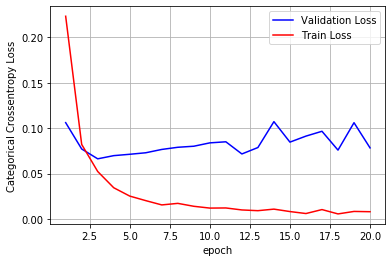

In [31]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

## **2 layer without drop out with batch norm**

In [0]:
from keras.layers.normalization import BatchNormalization

model_batch = Sequential()

model_batch.add(Dense(500, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(224, activation='relu', kernel_initializer=he_normal(seed=None)) )
model_batch.add(BatchNormalization())



model_batch.add(Dense(output_dim, activation='softmax'))

In [34]:
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) ## optimizer ==adam

history = model_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 9s 153us/step - loss: 0.1852 - acc: 0.9443 - val_loss: 0.1001 - val_acc: 0.9700
Epoch 2/20
60000/60000 [==============================] - 8s 134us/step - loss: 0.0686 - acc: 0.9789 - val_loss: 0.0817 - val_acc: 0.9763
Epoch 3/20
60000/60000 [==============================] - 8s 138us/step - loss: 0.0445 - acc: 0.9862 - val_loss: 0.0791 - val_acc: 0.9753
Epoch 4/20
60000/60000 [==============================] - 8s 136us/step - loss: 0.0340 - acc: 0.9890 - val_loss: 0.0786 - val_acc: 0.9772
Epoch 5/20
60000/60000 [==============================] - 8s 139us/step - loss: 0.0262 - acc: 0.9915 - val_loss: 0.0780 - val_acc: 0.9771
Epoch 6/20
60000/60000 [==============================] - 8s 136us/step - loss: 0.0214 - acc: 0.9930 - val_loss: 0.0754 - val_acc: 0.9797
Epoch 7/20
60000/60000 [==============================] - 8s 137us/step - loss: 0.0195 - acc: 0.9935 - val_loss: 0.0724 - 

Test score: 0.0779731295770489
Test accuracy: 0.982


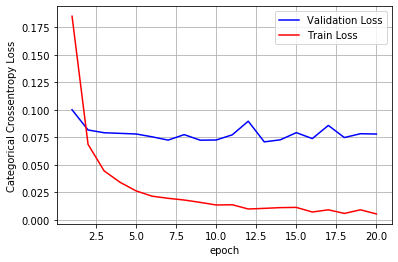

In [35]:
score = model_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

## **2 layer with drop out without batch norm**

In [0]:
model_drop = Sequential()

model_drop.add(Dense(500, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed=None)))
#model_drop.add(BatchNormalization())
model_drop.add(Dropout(rate=0.5))

model_drop.add(Dense(224, activation='relu', kernel_initializer=he_normal(seed=None)) )
#model_drop.add(BatchNormalization())
model_drop.add(Dropout(rate=0.5))



model_drop.add(Dense(output_dim, activation='softmax'))

In [37]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) ## optimizer ==adam

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 9s 149us/step - loss: 0.4279 - acc: 0.8663 - val_loss: 0.1463 - val_acc: 0.9547
Epoch 2/20
60000/60000 [==============================] - 8s 131us/step - loss: 0.1877 - acc: 0.9439 - val_loss: 0.1010 - val_acc: 0.9681
Epoch 3/20
60000/60000 [==============================] - 8s 132us/step - loss: 0.1456 - acc: 0.9555 - val_loss: 0.0890 - val_acc: 0.9729
Epoch 4/20
60000/60000 [==============================] - 8s 131us/step - loss: 0.1229 - acc: 0.9629 - val_loss: 0.0744 - val_acc: 0.9763
Epoch 5/20
60000/60000 [==============================] - 8s 130us/step - loss: 0.1114 - acc: 0.9657 - val_loss: 0.0733 - val_acc: 0.9785
Epoch 6/20
60000/60000 [==============================] - 8s 132us/step - loss: 0.0977 - acc: 0.9703 - val_loss: 0.0707 - val_acc: 0.9784
Epoch 7/20
60000/60000 [==============================] - 8s 131us/step - loss: 0.0875 - acc: 0.9725 - val_loss: 0.0679 - 

Test score: 0.06712127507654286
Test accuracy: 0.9829


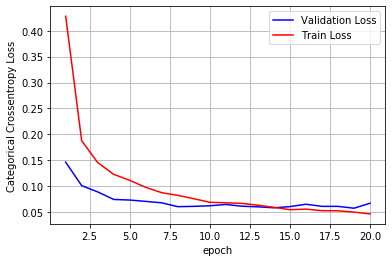

In [38]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

## **2 layer with dropout and batch norm**

In [0]:
model_drop = Sequential()

model_drop.add(Dense(500, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(rate=0.5))

model_drop.add(Dense(224, activation='relu', kernel_initializer=he_normal(seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(rate=0.5))

model_drop.add(Dense(output_dim, activation='softmax'))

In [41]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) ## optimizer ==adam

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 11s 175us/step - loss: 0.4112 - acc: 0.8749 - val_loss: 0.1343 - val_acc: 0.9581
Epoch 2/20
60000/60000 [==============================] - 9s 150us/step - loss: 0.1951 - acc: 0.9409 - val_loss: 0.1002 - val_acc: 0.9695
Epoch 3/20
60000/60000 [==============================] - 9s 150us/step - loss: 0.1535 - acc: 0.9531 - val_loss: 0.0900 - val_acc: 0.9724
Epoch 4/20
60000/60000 [==============================] - 9s 149us/step - loss: 0.1283 - acc: 0.9604 - val_loss: 0.0768 - val_acc: 0.9762
Epoch 5/20
60000/60000 [==============================] - 9s 150us/step - loss: 0.1185 - acc: 0.9636 - val_loss: 0.0679 - val_acc: 0.9784
Epoch 6/20
60000/60000 [==============================] - 9s 150us/step - loss: 0.1025 - acc: 0.9674 - val_loss: 0.0704 - val_acc: 0.9776
Epoch 7/20
60000/60000 [==============================] - 9s 150us/step - loss: 0.0984 - acc: 0.9697 - val_loss: 0.0698 -

Test score: 0.057800181532799616
Test accuracy: 0.9826


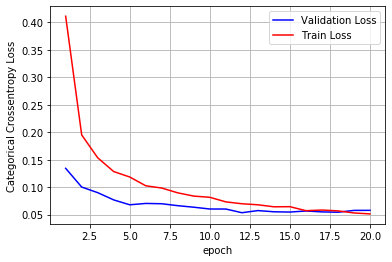

In [42]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

## **three layered mlp relu activation**

In [13]:
# Multilayer perceptron

model_sigmoid = Sequential()
model_sigmoid.add(Dense(500, activation='relu', input_shape=(input_dim,)))# first layer 500 neurons
model_sigmoid.add(Dense(124, activation='relu'))# second layer 124 neurons
model_sigmoid.add(Dense(50, activation='relu'))# third layer 50 neurons
model_sigmoid.add(Dense(output_dim, activation='softmax'))

In [14]:
model_sigmoid.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 500)               392500    
_________________________________________________________________
dense_2 (Dense)              (None, 124)               62124     
_________________________________________________________________
dense_3 (Dense)              (None, 50)                6250      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                510       
Total params: 461,384
Trainable params: 461,384
Non-trainable params: 0
_________________________________________________________________


In [15]:
model_sigmoid.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy']) ## optimizer ==sgd

history = model_sigmoid.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/20





60000/60000 [==============================] - 7s 113us/step - loss: 1.2421 - acc: 0.6858 - val_loss: 0.5226 - val_acc: 0.8680
Epoch 2/20
60000/60000 [==============================] - 7s 114us/step - loss: 0.4223 - acc: 0.8864 - val_loss: 0.3424 - val_acc: 0.9047
Epoch 3/20
60000/60000 [==============================] - 8s 126us/step - loss: 0.3238 - acc: 0.9087 - val_loss: 0.2905 - val_acc: 0.9199
Epoch 4/20
60000/60000 [==============================] - 6s 104us/step - loss: 0.2812 - acc: 0.9196 - val_loss: 0.2586 - val_acc: 0.9254
Epoch 5/20
60000/60000 [==============================] - 6s 94us/step - loss: 0.2538 - acc: 0.9278 - val_loss: 0.2372 - val_acc: 0.9305
Epoch 6/20
60000/60000 [==============================] - 6s 95us/step - loss: 0.2321 - acc: 0.9336 - val_loss: 0.2194 - val_acc: 0.9368
Epoch 7/20
60000/600

Test score: 0.11591833184994757
Test accuracy: 0.9646


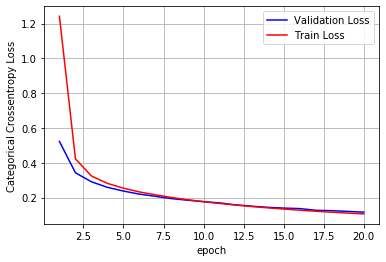

In [16]:
score = model_sigmoid.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

## **5 layered mlp with relu activation**

In [0]:
model_relu5 = Sequential()
model_relu5.add(Dense(500, activation='relu', input_shape=(input_dim,)))# first layer 500 neurons
model_relu5.add(Dense(324, activation='relu'))# second layer 324 neurons
model_relu5.add(Dense(250, activation='relu'))# third layer 250 neurons
model_relu5.add(Dense(150, activation='relu'))# forth layer 150 neurons
model_relu5.add(Dense(50, activation='relu'))# fifth layer 50 neurons
model_relu5.add(Dense(output_dim, activation='softmax'))

In [18]:
model_relu5.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 500)               392500    
_________________________________________________________________
dense_6 (Dense)              (None, 324)               162324    
_________________________________________________________________
dense_7 (Dense)              (None, 250)               81250     
_________________________________________________________________
dense_8 (Dense)              (None, 150)               37650     
_________________________________________________________________
dense_9 (Dense)              (None, 50)                7550      
_________________________________________________________________
dense_10 (Dense)             (None, 10)                510       
Total params: 681,784
Trainable params: 681,784
Non-trainable params: 0
________________________________________________

In [19]:
model_relu5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])# optimizer = adam

history = model_relu5.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 11s 186us/step - loss: 0.2587 - acc: 0.9226 - val_loss: 0.1134 - val_acc: 0.9660
Epoch 2/20
60000/60000 [==============================] - 11s 176us/step - loss: 0.0963 - acc: 0.9703 - val_loss: 0.0933 - val_acc: 0.9717
Epoch 3/20
60000/60000 [==============================] - 10s 171us/step - loss: 0.0669 - acc: 0.9793 - val_loss: 0.0921 - val_acc: 0.9718
Epoch 4/20
60000/60000 [==============================] - 11s 177us/step - loss: 0.0513 - acc: 0.9841 - val_loss: 0.0780 - val_acc: 0.9772
Epoch 5/20
60000/60000 [==============================] - 11s 177us/step - loss: 0.0387 - acc: 0.9875 - val_loss: 0.0834 - val_acc: 0.9781
Epoch 6/20
60000/60000 [==============================] - 10s 174us/step - loss: 0.0332 - acc: 0.9895 - val_loss: 0.0957 - val_acc: 0.9730
Epoch 7/20
60000/60000 [==============================] - 10s 174us/step - loss: 0.0283 - acc: 0.9914 - val_loss: 0.

Test score: 0.09293281461207743
Test accuracy: 0.9813


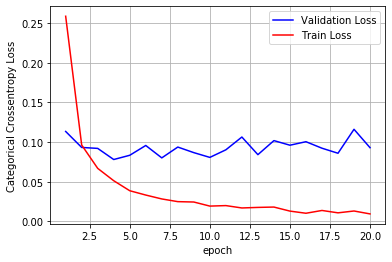

In [20]:
score = model_relu5.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

## **3 layered mlp with he_initializer without any batch_normalizer and dropout**

In [21]:
#he_normal(seed=None)
model_relu = Sequential()
model_relu.add(Dense(500, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed=None)))
model_relu.add(Dense(124, activation='relu', kernel_initializer=he_normal(seed=None)) )
model_relu.add(Dense(50, activation='relu', kernel_initializer=he_normal(seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 500)               392500    
_________________________________________________________________
dense_12 (Dense)             (None, 124)               62124     
_________________________________________________________________
dense_13 (Dense)             (None, 50)                6250      
_________________________________________________________________
dense_14 (Dense)             (None, 10)                510       
Total params: 461,384
Trainable params: 461,384
Non-trainable params: 0
_________________________________________________________________


In [22]:
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])# adam optimaizer

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 129us/step - loss: 0.2391 - acc: 0.9279 - val_loss: 0.1270 - val_acc: 0.9595
Epoch 2/20
60000/60000 [==============================] - 7s 118us/step - loss: 0.0889 - acc: 0.9724 - val_loss: 0.0971 - val_acc: 0.9706
Epoch 3/20
60000/60000 [==============================] - 7s 120us/step - loss: 0.0563 - acc: 0.9823 - val_loss: 0.0822 - val_acc: 0.9750
Epoch 4/20
60000/60000 [==============================] - 7s 116us/step - loss: 0.0392 - acc: 0.9878 - val_loss: 0.0756 - val_acc: 0.9766
Epoch 5/20
60000/60000 [==============================] - 7s 119us/step - loss: 0.0306 - acc: 0.9899 - val_loss: 0.0762 - val_acc: 0.9782
Epoch 6/20
60000/60000 [==============================] - 7s 119us/step - loss: 0.0244 - acc: 0.9921 - val_loss: 0.0803 - val_acc: 0.9770
Epoch 7/20
60000/60000 [==============================] - 7s 116us/step - loss: 0.0204 - acc: 0.9938 - val_loss: 0.0965 - 

Test score: 0.10216689538143828
Test accuracy: 0.9803


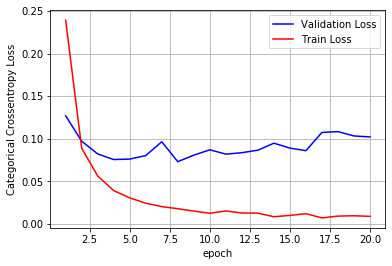

In [23]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

## **5 layered mlp with initializer = he_normal and relu activation without dropout and batch normalizer**

In [0]:
#he_normal(seed=None)
model_relu5 = Sequential()
model_relu5.add(Dense(500, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed=None)))
model_relu5.add(Dense(324, activation='relu', kernel_initializer=he_normal(seed=None)) )
model_relu5.add(Dense(250, activation='relu', kernel_initializer=he_normal(seed=None)) )
model_relu5.add(Dense(150, activation='relu', kernel_initializer=he_normal(seed=None)) )
model_relu5.add(Dense(50, activation='relu', kernel_initializer=he_normal(seed=None)) )
model_relu5.add(Dense(output_dim, activation='softmax'))



In [25]:
model_relu5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu5.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 11s 185us/step - loss: 0.2317 - acc: 0.9279 - val_loss: 0.1104 - val_acc: 0.9646
Epoch 2/20
60000/60000 [==============================] - 11s 180us/step - loss: 0.0889 - acc: 0.9729 - val_loss: 0.0956 - val_acc: 0.9695
Epoch 3/20
60000/60000 [==============================] - 10s 174us/step - loss: 0.0611 - acc: 0.9806 - val_loss: 0.1075 - val_acc: 0.9668
Epoch 4/20
60000/60000 [==============================] - 11s 179us/step - loss: 0.0483 - acc: 0.9847 - val_loss: 0.0761 - val_acc: 0.9786
Epoch 5/20
60000/60000 [==============================] - 10s 174us/step - loss: 0.0368 - acc: 0.9882 - val_loss: 0.0801 - val_acc: 0.9782
Epoch 6/20
60000/60000 [==============================] - 10s 172us/step - loss: 0.0317 - acc: 0.9901 - val_loss: 0.0837 - val_acc: 0.9776
Epoch 7/20
60000/60000 [==============================] - 11s 176us/step - loss: 0.0272 - acc: 0.9913 - val_loss: 0.

Test score: 0.08569526613150633
Test accuracy: 0.9824


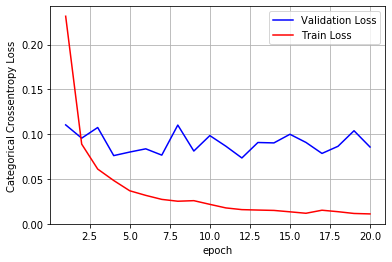

In [26]:
score = model_relu5.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

## **3 layered mlp with batch normalizer without dropout activation  is relu and initializer is he_normal**

In [27]:
from keras.layers.normalization import BatchNormalization

model_batch = Sequential()

model_batch.add(Dense(500, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(124, activation='relu', kernel_initializer=he_normal(seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(50, activation='relu', kernel_initializer=he_normal(seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(output_dim, activation='softmax'))


In [28]:
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 160us/step - loss: 0.2196 - acc: 0.9367 - val_loss: 0.1035 - val_acc: 0.9682
Epoch 2/20
60000/60000 [==============================] - 8s 133us/step - loss: 0.0815 - acc: 0.9752 - val_loss: 0.0995 - val_acc: 0.9690
Epoch 3/20
60000/60000 [==============================] - 8s 135us/step - loss: 0.0521 - acc: 0.9844 - val_loss: 0.0733 - val_acc: 0.9769
Epoch 4/20
60000/60000 [==============================] - 8s 139us/step - loss: 0.0385 - acc: 0.9878 - val_loss: 0.0858 - val_acc: 0.9732
Epoch 5/20
60000/60000 [==============================] - 8s 137us/step - loss: 0.0326 - acc: 0.9890 - val_loss: 0.0796 - val_acc: 0.9771
Epoch 6/20
60000/60000 [==============================] - 8s 140us/step - loss: 0.0254 - acc: 0.9916 - val_loss: 0.0763 - val_acc: 0.9759
Epoch 7/20
60000/60000 [==============================] - 8s 134us/step - loss: 0.0229 - acc: 0.9924 - val_loss: 0.0837 -

Test score: 0.08583917959941027
Test accuracy: 0.9802


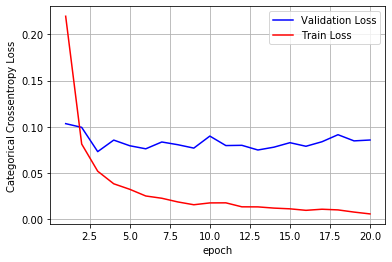

In [29]:
score = model_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

## **5 layered mlp with batch normalizer without dropout activation  is relu and initializer is he_normal**

In [0]:
model_batch = Sequential()

model_batch.add(Dense(500, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(324, activation='relu', kernel_initializer=he_normal(seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(250, activation='relu', kernel_initializer=he_normal(seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(150, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed=None)))
model_batch.add(BatchNormalization())


model_batch.add(Dense(50, activation='relu', kernel_initializer=he_normal(seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(output_dim, activation='softmax'))

In [31]:
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 15s 242us/step - loss: 0.2159 - acc: 0.9370 - val_loss: 0.1096 - val_acc: 0.9672
Epoch 2/20
60000/60000 [==============================] - 13s 214us/step - loss: 0.0855 - acc: 0.9741 - val_loss: 0.0858 - val_acc: 0.9727
Epoch 3/20
60000/60000 [==============================] - 13s 219us/step - loss: 0.0591 - acc: 0.9816 - val_loss: 0.0929 - val_acc: 0.9715
Epoch 4/20
60000/60000 [==============================] - 13s 224us/step - loss: 0.0469 - acc: 0.9850 - val_loss: 0.0845 - val_acc: 0.9742
Epoch 5/20
60000/60000 [==============================] - 13s 225us/step - loss: 0.0399 - acc: 0.9870 - val_loss: 0.0787 - val_acc: 0.9758
Epoch 6/20
60000/60000 [==============================] - 13s 219us/step - loss: 0.0332 - acc: 0.9890 - val_loss: 0.0825 - val_acc: 0.9768
Epoch 7/20
60000/60000 [==============================] - 13s 219us/step - loss: 0.0305 - acc: 0.9902 - val_loss: 0.

Test score: 0.07765144463920151
Test accuracy: 0.9805


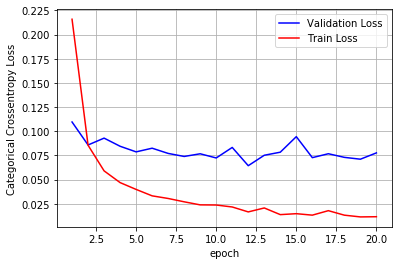

In [32]:
score = model_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

## **3 layered mlp without batch normalizer with dropout activation  is relu and initializer is he_normal**

In [0]:
from keras.layers import Dropout

In [33]:
from keras.layers import Dropout

model_drop = Sequential()

model_drop.add(Dense(500, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed=None)))
#model_drop.add(BatchNormalization())
model_drop.add(Dropout(rate=0.5))

model_drop.add(Dense(124, activation='relu', kernel_initializer=he_normal(seed=None)) )
#model_drop.add(BatchNormalization())
model_drop.add(Dropout(rate=0.5))

model_drop.add(Dense(50, activation='relu', kernel_initializer=he_normal(seed=None)) )
model_drop.add(Dropout(rate=0.5))

model_drop.add(Dense(output_dim, activation='softmax'))



Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [34]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 161us/step - loss: 0.8373 - acc: 0.7324 - val_loss: 0.2008 - val_acc: 0.9433
Epoch 2/20
60000/60000 [==============================] - 8s 133us/step - loss: 0.3337 - acc: 0.9118 - val_loss: 0.1581 - val_acc: 0.9560
Epoch 3/20
60000/60000 [==============================] - 8s 133us/step - loss: 0.2548 - acc: 0.9356 - val_loss: 0.1196 - val_acc: 0.9681
Epoch 4/20
60000/60000 [==============================] - 8s 132us/step - loss: 0.2166 - acc: 0.9455 - val_loss: 0.1190 - val_acc: 0.9674
Epoch 5/20
60000/60000 [==============================] - 8s 133us/step - loss: 0.1895 - acc: 0.9522 - val_loss: 0.1035 - val_acc: 0.9721
Epoch 6/20
60000/60000 [==============================] - 8s 140us/step - loss: 0.1690 - acc: 0.9572 - val_loss: 0.0966 - val_acc: 0.9744
Epoch 7/20
60000/60000 [==============================] - 8s 136us/step - loss: 0.1536 - acc: 0.9613 - val_loss: 0.0966 -

Test score: 0.07902954334445494
Test accuracy: 0.9818


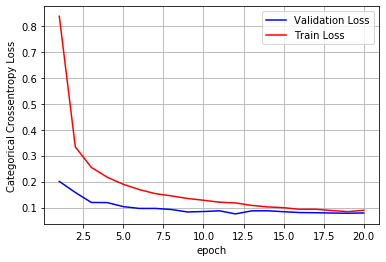

In [35]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

## **5 layered mlp without batch normalizer with dropout activation  is relu and initializer is he_normal**

In [14]:
model_drop = Sequential()

model_drop.add(Dense(500, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed=None)))
#model_drop.add(BatchNormalization())
model_drop.add(Dropout(rate=0.5))

model_drop.add(Dense(324, activation='relu', kernel_initializer=he_normal(seed=None)) )
#model_drop.add(BatchNormalization())
model_drop.add(Dropout(rate=0.5))



model_drop.add(Dense(250, activation='relu',kernel_initializer=he_normal(seed=None)))
#model_drop.add(BatchNormalization())
model_drop.add(Dropout(rate=0.5))

model_drop.add(Dense(150, activation='relu', kernel_initializer=he_normal(seed=None)) )
#model_drop.add(BatchNormalization())
model_drop.add(Dropout(rate=0.5))

model_drop.add(Dense(50, activation='relu', kernel_initializer=he_normal(seed=None)) )
#model_drop.add(BatchNormalization())
model_drop.add(Dropout(rate=0.5))

model_drop.add(Dense(output_dim, activation='softmax'))




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



In [15]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/20





60000/60000 [==============================] - 14s 232us/step - loss: 1.4113 - acc: 0.5080 - val_loss: 0.3152 - val_acc: 0.9228
Epoch 2/20
60000/60000 [==============================] - 13s 212us/step - loss: 0.4782 - acc: 0.8766 - val_loss: 0.2036 - val_acc: 0.9492
Epoch 3/20
60000/60000 [==============================] - 13s 212us/step - loss: 0.3456 - acc: 0.9176 - val_loss: 0.1814 - val_acc: 0.9567
Epoch 4/20
60000/60000 [==============================] - 13s 211us/step - loss: 0.2901 - acc: 0.9312 - val_loss: 0.1579 - val_acc: 0.9616
Epoch 5/20
60000/60000 [==============================] - 13s 213us/step - loss: 0.2567 - acc: 0.9411 - val_loss: 0.1403 - val_acc: 0.9656
Epoch 6/20
60000/60000 [==============================] - 13s 210us/step - loss: 0.2308 - acc: 0.9463 - val_loss: 0.1383 - val_acc: 0.9670
Epoch 7/20
6

Test score: 0.09795631028999714
Test accuracy: 0.9796


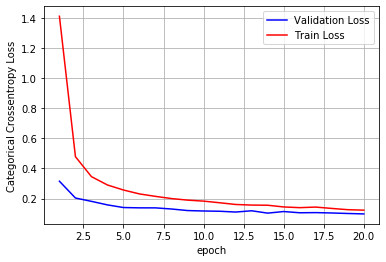

In [16]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

## **3 layered mlp with batch normalizer with dropout activation  is relu and initializer is he_normal**

In [0]:
model_drop = Sequential()

model_drop.add(Dense(500, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(rate=0.5))

model_drop.add(Dense(124, activation='relu', kernel_initializer=he_normal(seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(rate=0.5))

model_drop.add(Dense(50, activation='relu', kernel_initializer=he_normal(seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(rate=0.5))

model_drop.add(Dense(output_dim, activation='softmax'))

In [41]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 12s 199us/step - loss: 0.7329 - acc: 0.7792 - val_loss: 0.1838 - val_acc: 0.9449
Epoch 2/20
60000/60000 [==============================] - 9s 157us/step - loss: 0.3083 - acc: 0.9140 - val_loss: 0.1400 - val_acc: 0.9591
Epoch 3/20
60000/60000 [==============================] - 10s 159us/step - loss: 0.2327 - acc: 0.9355 - val_loss: 0.1157 - val_acc: 0.9644
Epoch 4/20
60000/60000 [==============================] - 10s 166us/step - loss: 0.2002 - acc: 0.9455 - val_loss: 0.0978 - val_acc: 0.9711
Epoch 5/20
60000/60000 [==============================] - 10s 160us/step - loss: 0.1712 - acc: 0.9524 - val_loss: 0.0960 - val_acc: 0.9724
Epoch 6/20
60000/60000 [==============================] - 10s 162us/step - loss: 0.1545 - acc: 0.9576 - val_loss: 0.0905 - val_acc: 0.9741
Epoch 7/20
60000/60000 [==============================] - 9s 155us/step - loss: 0.1431 - acc: 0.9611 - val_loss: 0.08

Test score: 0.06307774550883914
Test accuracy: 0.9816


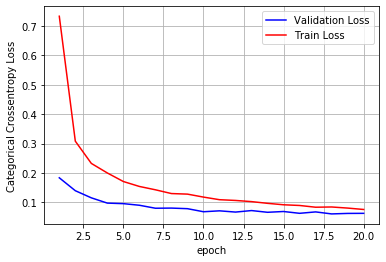

In [42]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

## **5 layered mlp with batch normalizer with dropout activation  is relu and initializer is he_normal**

In [0]:
model_drop = Sequential()

model_drop.add(Dense(500, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(rate=0.5))

model_drop.add(Dense(324, activation='relu', kernel_initializer=he_normal(seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(rate=0.5))



model_drop.add(Dense(250, activation='relu',kernel_initializer=he_normal(seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(rate=0.5))

model_drop.add(Dense(150, activation='relu', kernel_initializer=he_normal(seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(rate=0.5))

model_drop.add(Dense(50, activation='relu', kernel_initializer=he_normal(seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(rate=0.5))

model_drop.add(Dense(output_dim, activation='softmax'))

In [17]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 14s 225us/step - loss: 0.1271 - acc: 0.9715 - val_loss: 0.1136 - val_acc: 0.9783
Epoch 2/20
60000/60000 [==============================] - 13s 215us/step - loss: 0.1220 - acc: 0.9728 - val_loss: 0.1099 - val_acc: 0.9786
Epoch 3/20
60000/60000 [==============================] - 13s 215us/step - loss: 0.1127 - acc: 0.9737 - val_loss: 0.1004 - val_acc: 0.9800
Epoch 4/20
60000/60000 [==============================] - 13s 214us/step - loss: 0.1142 - acc: 0.9740 - val_loss: 0.1065 - val_acc: 0.9784
Epoch 5/20
60000/60000 [==============================] - 13s 218us/step - loss: 0.1144 - acc: 0.9733 - val_loss: 0.1069 - val_acc: 0.9802
Epoch 6/20
60000/60000 [==============================] - 13s 219us/step - loss: 0.1079 - acc: 0.9743 - val_loss: 0.1049 - val_acc: 0.9796
Epoch 7/20
60000/60000 [==============================] - 13s 218us/step - loss: 0.1029 - acc: 0.9759 - val_loss: 0.

Test score: 0.10175361420742388
Test accuracy: 0.983


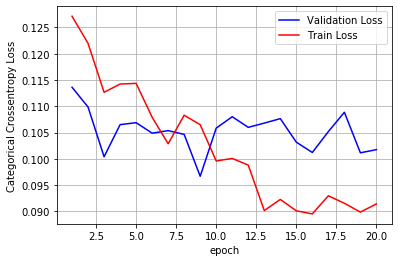

In [18]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [0]:
# Please compare all your models using Prettytable library
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["layer", "type", "log_loss","accuracy"]

In [0]:


x.add_row(['2_layer','without dropout and batch_norm',0.07829980347480105,0.9832])
x.add_row(['2_layer','without dropout and with batch_norm',0.0779731295770489,0.982])
x.add_row(['2_layer','with dropout and without batch_norm',0.06712127507654286,0.9829])
x.add_row(['2_layer','with dropout and with batch_norm',0.057800181532799616,0.9826])
x.add_row(['3_layer','without dropout and batch_norm',0.10216689538143828,0.9803])
x.add_row(['5_layer','without dropout and batch_norm',0.08569526613150633,0.9824])
x.add_row(['3_layer','without dropout and with batch_norm',0.08583917959941027,0.9802])
x.add_row(['5_layer','without dropout and with batch_norm',0.07765144463920151,0.9805])
x.add_row(['3_layer','with dropout and without batch_norm',0.07902954334445494,0.9818])
x.add_row(['5_layer','with dropout and without batch_norm',0.09795631028999714,0.9796])
x.add_row(['3_layer','with dropout and with batch_norm',0.06307774550883914,0.9816])
x.add_row(['5_layer','with dropout and with batch_norm',0.10175361420742388,0.983])

In [45]:
print(x)

+---------+-------------------------------------+----------------------+----------+
|  layer  |                 type                |       log_loss       | accuracy |
+---------+-------------------------------------+----------------------+----------+
| 2_layer |    without dropout and batch_norm   | 0.07829980347480105  |  0.9832  |
| 2_layer | without dropout and with batch_norm |  0.0779731295770489  |  0.982   |
| 2_layer | with dropout and without batch_norm | 0.06712127507654286  |  0.9829  |
| 2_layer |   with dropout and with batch_norm  | 0.057800181532799616 |  0.9826  |
| 3_layer |    without dropout and batch_norm   | 0.10216689538143828  |  0.9803  |
| 5_layer |    without dropout and batch_norm   | 0.08569526613150633  |  0.9824  |
| 3_layer | without dropout and with batch_norm | 0.08583917959941027  |  0.9802  |
| 5_layer | without dropout and with batch_norm | 0.07765144463920151  |  0.9805  |
| 3_layer | with dropout and without batch_norm | 0.07902954334445494  |  0.